## Gait Video Study
Some vizualizations for the pipeline figure in the paper

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from mpl_toolkits import mplot3d
import os

### 3D vizualizations for the front and side views

In [2]:
side_path= 'C:\\Users\\Rachneet Kaur\\Box\\Gait Video Project\\GaitVideoData\\video\\3D_data\\MS\\walking\\feet\\InkedGVS_323_W_T2_0_Trim\\processed3d\\'
side_save_path = 'C:\\Users\\Rachneet Kaur\\Box\\Gait Video Project\\figures\\frameworks_pic\\side_3d\\'
front_save_path = 'C:\\Users\\Rachneet Kaur\\Box\\Gait Video Project\\figures\\frameworks_pic\\front_3d\\'

In [5]:
def side_viz(side_file):
    print ('Running for', side_file)
    side3D_orig = pd.read_csv(side_path + side_file)
#     print (side3D_orig)
    side3D_left = side3D_orig.set_index(['Unnamed: 0']).reindex(['left toe 2', 'left toe 1', 'left heel', 'left toe 2', 'left heel', 'left ankle'])
    side3D_left.reset_index(inplace=True)
    side3D_left = side3D_left[side3D_left['confidence']!=0]

    side3D_right = side3D_orig.set_index(['Unnamed: 0']).reindex(['right ankle', 'right heel', 'right toe 1', 'right toe 2', 'right heel'])
    side3D_right.reset_index(inplace=True)
    side3D_right = side3D_right[side3D_right['confidence']!=0]
             
#     print (side3D_left)
#     print (side3D_right)
    
    left_ankle_x = side3D_left[side3D_left['Unnamed: 0']=='left ankle'].x.values[0]
    right_ankle_x = side3D_right[side3D_right['Unnamed: 0']=='right ankle'].x.values[0]
    if (left_ankle_x<right_ankle_x): #Only if left foot is closer to the treadmill origin than the right foot   
        fig = plt.figure(figsize = (8, 8))
        font = {'size'   : 22}
        mpl.rc('font', **font)
        ax = plt.axes(projection='3d')
        ax.plot3D(side3D_left['y'], side3D_left['x'], side3D_left['z'], '-',  marker = 'o', color = 'limegreen', markersize = 11, markerfacecolor = 'deepskyblue', markeredgecolor = 'k', linewidth = 3, alpha = 1, label = 'Left limb')
        ax.plot3D(side3D_right['y'], side3D_right['x'], side3D_right['z'], '-',  marker = 'o', color = 'deeppink', markersize = 11, markerfacecolor = 'deepskyblue', markeredgecolor = 'k', linewidth = 3, alpha = 1, label = 'Right limb')

    #     for i in range(len(side3D_orig)): #plot each point + it's index as text above
    #         ax.text(side3D_orig['y'][i],side3D_orig['x'][i],side3D_orig['z'][i],  '%s' % side3D_orig['Unnamed: 0'][i], size=10, zorder=1,  
    #         color='k') 

        ax.set_xlabel('$y$ (anterior-posterior)', fontsize = 24, labelpad = 27)
        ax.set_ylabel('$x$ (lateral)', fontsize = 24, labelpad = 27)
        ax.set_zlabel('$z$ (height)', fontsize = 24, labelpad = 29)
        plt.ylim([85, 35])
        plt.xlim([225, 260])
        ax.set_zlim(0, 30)

    #     plt.ylim([87, 0])
    #     plt.xlim([0, 310])
    #     ax.set_zlim([0, 120])

        ax.xaxis.pane.fill = False
        ax.yaxis.pane.fill = False
    #     ax.zaxis.pane.fill = False

        # Now set color to white (or whatever is "invisible")
        ax.xaxis.pane.set_edgecolor('w')
        ax.yaxis.pane.set_edgecolor('w')
        ax.zaxis.pane.set_edgecolor('k')

        ax.zaxis.pane.set_color('gainsboro')

        ax.tick_params(axis='x', which='major', pad=10)
        ax.tick_params(axis='y', which='major', pad=8)
        ax.tick_params(axis='z', which='major', pad=13)

        ax.set_yticks([40, 60, 80])
        ax.set_yticklabels(['40 cm', '60 cm', '80 cm'], rotation = 0)

        ax.set_zticks([0, 10, 20, 30])
        ax.set_zticklabels(['0', '10 cm', '20 cm', '30 cm'])

        ax.set_xticks([230, 240, 250, 260])
        ax.set_xticklabels(['230 cm', '240 cm', '250 cm', '260 cm'])

        ax.grid(True, linestyle='--', color = 'lightgrey', alpha = 0.6)
        plt.legend()
        plt.tight_layout()
        plt.savefig(side_save_path+ '_Final_'+ side_file[:-3]+'png', dpi = 350, bbox_inches='tight')
        plt.show()

Running for 1394.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:67: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


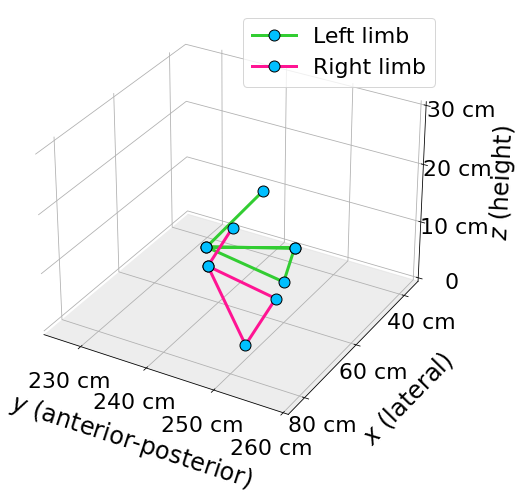

Running for 1484.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:67: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


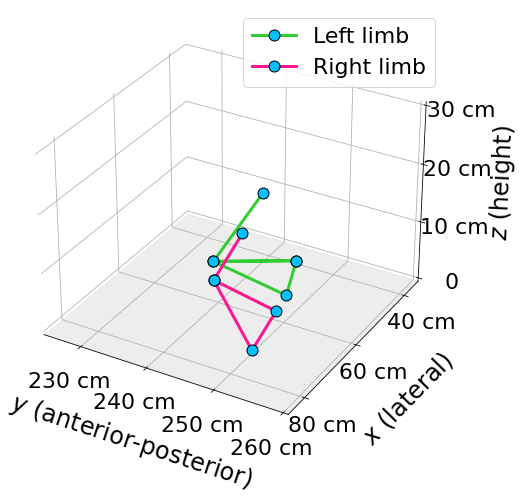

In [6]:
side_files = os.listdir(side_path)
relevant_side_files = ['1394.csv', '1484.csv']

# ['1012.csv', '1044.csv', '1234.csv', '1394.csv', '1422.csv', '1424.csv', '1453.csv', '1456.csv', '1477.csv', \
#      '1478.csv', '1484.csv', '1486.csv', '1488.csv', '1507.csv', '1516.csv', '1574.csv', '1651.csv', '1667.csv', \
#      '1682.csv', '271.csv', '305.csv', '367.csv', '371.csv', '400.csv', '401.csv', '402.csv', '462.csv', \
#      '492.csv', '494.csv', '495.csv', '616.csv', '620.csv', '738.csv', '796.csv', '828.csv','831.csv',\
#  '858.csv', '892.csv', '893.csv', '985.csv'] 

for side_file in relevant_side_files:
    side_viz(side_file)
    
#Pink = right, grey = left


In [7]:
# front_path = 'C:\\Users\\Rachneet Kaur\\Box\\Gait Video Project\\GaitVideoData\\video\\3D_data\\MS\\walking\\lower_body\\InkedGVS_310_W_T2_1_Trim\\processed3d\\'
front_path = 'C:\\Users\\Rachneet Kaur\\Box\\Gait Video Project\\GaitVideoData\\video\\3D_data\\HOA\\walking\\lower_body\\InkedGVS_215_W_T1_1_Trim\\processed3d\\'
front_file = '659.csv'

In [8]:
def front_viz(front_file):
    front3D_orig = pd.read_csv(front_path + front_file)
    mid_hip_coords = (front3D_orig[front3D_orig['Unnamed: 0']=='right hip'][['x', 'y', 'z', 'confidence']].values + front3D_orig[front3D_orig['Unnamed: 0']=='left hip'][['x', 'y', 'z', 'confidence']].values)/2
    front3D_orig.loc[len(front3D_orig)] = ['mid_hip'] + list(mid_hip_coords[0])
    front3D_left = front3D_orig.set_index(['Unnamed: 0']).reindex(['left toe 2', 'left heel', 'left toe 1', 'left toe 2', 'left heel', 'left ankle', \
                     'left knee', 'left hip', 'mid_hip'])
    front3D_left.reset_index(inplace=True)
    
    front3D_right = front3D_orig.set_index(['Unnamed: 0']).reindex(['mid_hip', 'right hip', 'right knee', 'right ankle', 'right heel', 'right toe 1', \
                    'right heel', 'right toe 2', 'right toe 1'])  
    front3D_right.reset_index(inplace=True)
    
    print ('Running for:', front_file)
    fig = plt.figure(figsize = (8, 8))
    font = {'size'   : 22}
    mpl.rc('font', **font)
    ax = plt.axes(projection='3d')
    ax.plot3D(front3D_left['y'], front3D_left['x'], front3D_left['z'], '-',  marker = 'o', color = 'limegreen', markersize = 11, markerfacecolor = 'tomato', markeredgecolor = 'k', linewidth = 3, label = 'Left limb')
    ax.plot3D(front3D_right['y'], front3D_right['x'], front3D_right['z'], '-',  marker = 'o', color = 'deeppink', markersize = 11, markerfacecolor = 'tomato', markeredgecolor = 'k', linewidth = 3, label = 'Right limb')
    # for i in range(len(front3D_orig)): #plot each point + it's index as text above
    #     ax.text(front3D_orig['y'][i],front3D_orig['x'][i],front3D_orig['z'][i],  '%s' % front3D_orig['Unnamed: 0'][i], size=10, zorder=1,  
    #     color='k') 

    ax.set_xlabel('$y$ (anterior-posterior)', fontsize = 24, labelpad = 23)
    ax.set_ylabel('$x$ (lateral)', fontsize = 24, labelpad = 27)
    ax.set_zlabel('$z$ (height)', fontsize = 24, labelpad = 32)
    plt.ylim([87, 0])
    plt.xlim([0, 310])
    ax.set_zlim([0, 120])

    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
#     ax.zaxis.pane.fill = False

    # Now set color to white (or whatever is "invisible")
    ax.xaxis.pane.set_edgecolor('w')
    ax.yaxis.pane.set_edgecolor('w')
    ax.zaxis.pane.set_edgecolor('k')
    
    ax.zaxis.pane.set_color('gainsboro')
    
    ax.tick_params(axis='x', which='major', pad=8)
    ax.tick_params(axis='y', which='major', pad=8)
    ax.tick_params(axis='z', which='major', pad=14)

    ax.set_yticks([0, 25, 50, 75])
    ax.set_yticklabels(['0', '25 cm', '50 cm', '75 cm'], rotation = 0)
    
    ax.set_xticks([0, 100, 200, 300])
    ax.set_xticklabels(['0', '100 cm', '200 cm', '300 cm'])

    ax.set_zticks([0, 40, 80, 120])
    ax.set_zticklabels(['0', '40 cm', '80 cm', '120 cm'])
    plt.legend()
    ax.grid(True, linestyle='--', color = 'lightgrey', alpha = 0.6)
    plt.tight_layout()
    plt.savefig(front_save_path+ 'Final_' + front_file[:-3]+'png', dpi = 350, bbox_inches='tight')
    
    plt.show()

Running for: 1001.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:56: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


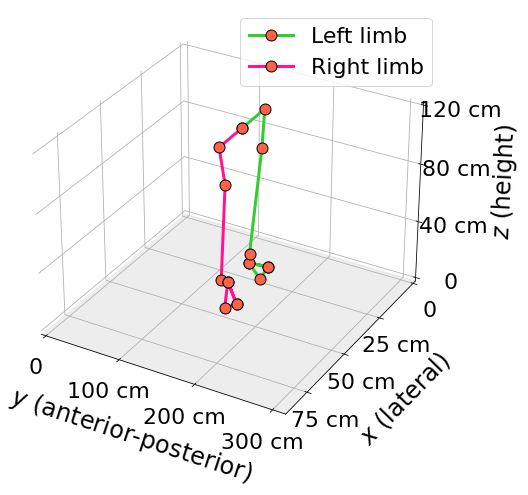

In [9]:
front_files = os.listdir(front_path)
relevant_front_files = ['1001.csv']

for front_file in relevant_front_files:
    front_viz(front_file)
    
    
#103, 104, 1047, 1048, 105, 106, 1065, 109, 1142, 1143, 
#1000, 1001, 

In [ ]:
#Add cm 
#Increase distance between tick label and 
#lateral, AP, height instead of width, length, height 
#RED - BLue - mix red - purple 
#Increase font of tiks nd labels - ticks evey 40 
#Remove the grey shading from back and side and keep only on bottom to give visual cue that treadmill is at bottom 
#Keep the gridlines
#Littles toes be star, big toes be traingles, 

### Multi view merged 3D visualization 

In [10]:
multi_view_save_path = 'C:\\Users\\Rachneet Kaur\\Box\\Gait Video Project\\figures\\frameworks_pic\\multi_view\\'

In [11]:
# multi_view_path = 'C:\\Users\\Rachneet Kaur\\Box\\Gait Video Project\\GaitVideoData\\video\\multi_view_merged_data\\MS\\walking\\GVS_310_W_T2\\' #hip_height_normalized\\
multi_view_path = 'C:\\Users\\Rachneet Kaur\\Box\\Gait Video Project\\GaitVideoData\\video\\multi_view_merged_data\\HOA\\walking\\GVS_215_W_T1\\' #hip_height_normalized\\
multi_view_file = '659.csv'

multi_view_hip_norm_path = 'C:\\Users\\Rachneet Kaur\\Box\\Gait Video Project\\GaitVideoData\\video\\multi_view_merged_data\\HOA\\walking\\GVS_215_W_T1\\hip_height_normalized\\'
multi_view_hip_norm_file = '659.csv'

In [12]:
def multi_view_viz(multi_view_file, hip_normalized = False):
    multi_view3D_orig = pd.read_csv(multi_view_path + multi_view_file)
    mid_hip_coords = (multi_view3D_orig[multi_view3D_orig['Unnamed: 0']=='right hip'][['x', 'y', 'z', 'confidence']].values + multi_view3D_orig[multi_view3D_orig['Unnamed: 0']=='left hip'][['x', 'y', 'z', 'confidence']].values)/2
    multi_view3D_orig.loc[len(multi_view3D_orig)] = ['mid_hip'] + list(mid_hip_coords[0])
    multi_view3D_left_purple = multi_view3D_orig.set_index(['Unnamed: 0']).reindex(['left toe 2', 'left heel', 'left toe 1', 'left toe 2', 'left heel', 'left ankle', 'left knee'])
    multi_view3D_left_purple.reset_index(inplace=True)
    
    multi_view3D_left_red = multi_view3D_orig.set_index(['Unnamed: 0']).reindex(['left knee', 'left hip', 'mid_hip'])
    multi_view3D_left_red.reset_index(inplace=True)
        
    
    multi_view3D_right_purple = multi_view3D_orig.set_index(['Unnamed: 0']).reindex(['right knee', 'right ankle', 'right heel', 'right toe 1', 'right heel', 'right toe 2', 'right toe 1'])  
    multi_view3D_right_purple.reset_index(inplace=True)

    multi_view3D_right_red = multi_view3D_orig.set_index(['Unnamed: 0']).reindex(['mid_hip', 'right hip', 'right knee'])  
    multi_view3D_right_red.reset_index(inplace=True)
     
    print ('Running for:', multi_view_file)
    fig = plt.figure(figsize = (8, 8))
    font = {'size'   : 22}
    mpl.rc('font', **font)
    ax = plt.axes(projection='3d')
    ax.plot3D(multi_view3D_left_purple['y'], multi_view3D_left_purple['x'], multi_view3D_left_purple['z'], '-',  marker = 'o', color = 'limegreen', markersize = 11, markerfacecolor = 'violet', markeredgecolor = 'k', linewidth = 3)
    ax.plot3D(multi_view3D_left_red['y'], multi_view3D_left_red['x'], multi_view3D_left_red['z'], '-',  marker = 'o', color = 'limegreen', markersize = 11, markerfacecolor = 'tomato', markeredgecolor = 'k', linewidth = 3)
    ax.plot3D(multi_view3D_right_purple['y'], multi_view3D_right_purple['x'], multi_view3D_right_purple['z'], '-',  marker = 'o', color = 'deeppink', markersize = 11, markerfacecolor = 'violet', markeredgecolor = 'k', linewidth = 3)
    ax.plot3D(multi_view3D_right_red['y'], multi_view3D_right_red['x'], multi_view3D_right_red['z'], '-',  marker = 'o', color = 'deeppink', markersize = 11, markerfacecolor = 'tomato', markeredgecolor = 'k', linewidth = 3)
    
    # for i in range(len(front3D_orig)): #plot each point + it's index as text above
    #     ax.text(front3D_orig['y'][i],front3D_orig['x'][i],front3D_orig['z'][i],  '%s' % front3D_orig['Unnamed: 0'][i], size=10, zorder=1,  
    #     color='k') 

    ax.set_xlabel('$y$ (anterior-posterior)', fontsize = 24, labelpad = 23)
    ax.set_ylabel('$x$ (lateral)', fontsize = 24, labelpad = 27)
    ax.set_zlabel('$z$ (height)', fontsize = 24, labelpad = 32)
    plt.ylim([87, 0])
    plt.xlim([0, 310])
    ax.set_zlim([0, 120])

    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
#     ax.zaxis.pane.fill = False

    # Now set color to white (or whatever is "invisible")
    ax.xaxis.pane.set_edgecolor('w')
    ax.yaxis.pane.set_edgecolor('w')
    ax.zaxis.pane.set_edgecolor('k')
    
    ax.zaxis.pane.set_color('gainsboro')
    
    ax.tick_params(axis='x', which='major', pad=8)
    ax.tick_params(axis='y', which='major', pad=8)
    ax.tick_params(axis='z', which='major', pad=14)

    ax.set_yticks([0, 25, 50, 75])
    ax.set_yticklabels(['0', '25 cm', '50 cm', '75 cm'], rotation = 0)
    
    ax.set_xticks([0, 100, 200, 300])
    ax.set_xticklabels(['0', '100 cm', '200 cm', '300 cm'])

    ax.set_zticks([0, 40, 80, 120])
    ax.set_zticklabels(['0', '40 cm', '80 cm', '120 cm'])
    ax.grid(True, linestyle='--', color = 'lightgrey', alpha = 0.6)
    plt.tight_layout()

    custom_lines = [Line2D([0], [0], color='limegreen', lw=4),
                    Line2D([0], [0], color='deeppink', lw=4)
                   ]
    ax.legend(custom_lines, ['Left limb', 'Right limb'])


    if hip_normalized:
        plt.savefig(multi_view_save_path+ 'hip_normalized_' + multi_view_file[:-3]+'png', dpi = 350, bbox_inches='tight')
    else:
        plt.savefig(multi_view_save_path+ multi_view_file[:-3]+'png', dpi = 350, bbox_inches='tight')
    plt.show()

Running for: 0.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


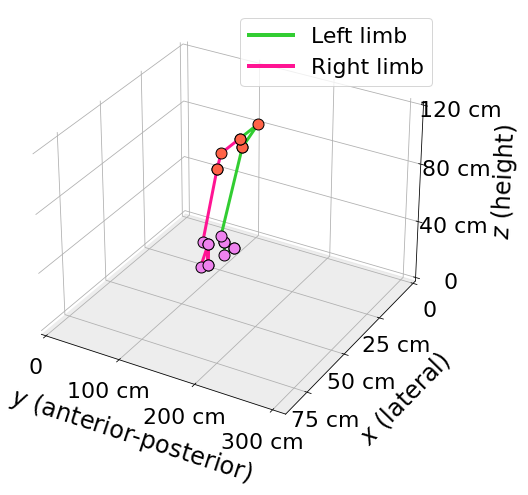

Running for: 1.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


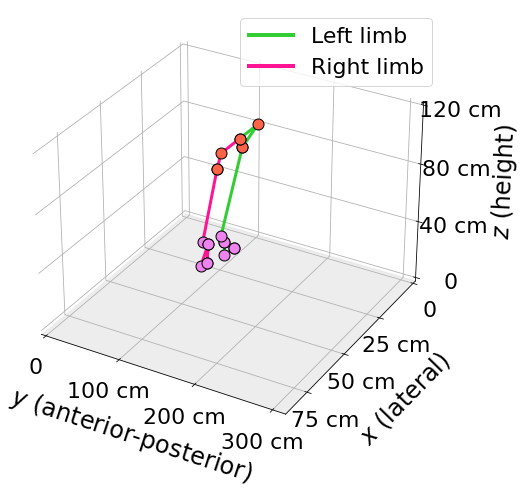

Running for: 10.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


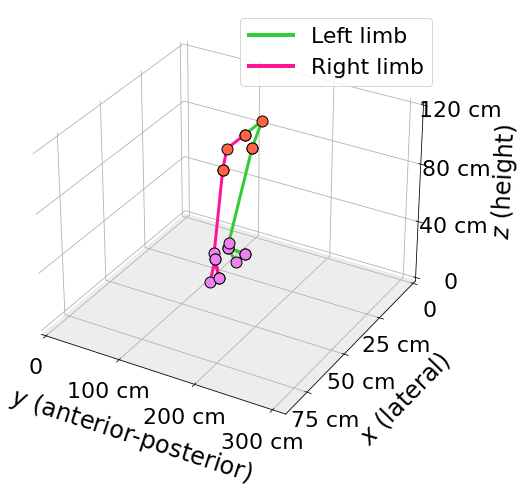

Running for: 100.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


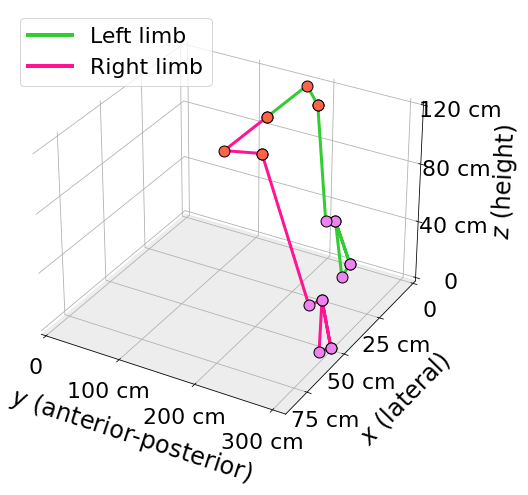

Running for: 1000.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


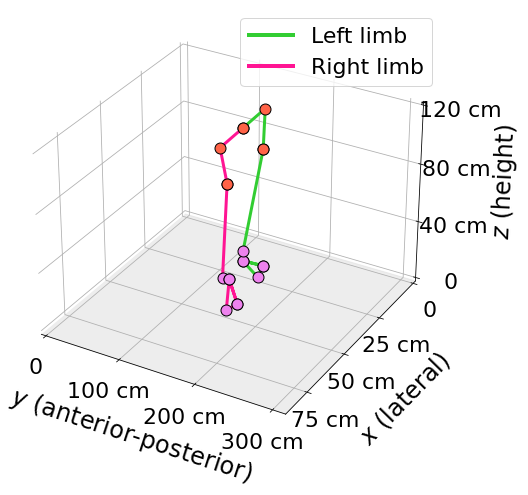

Running for: 1001.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


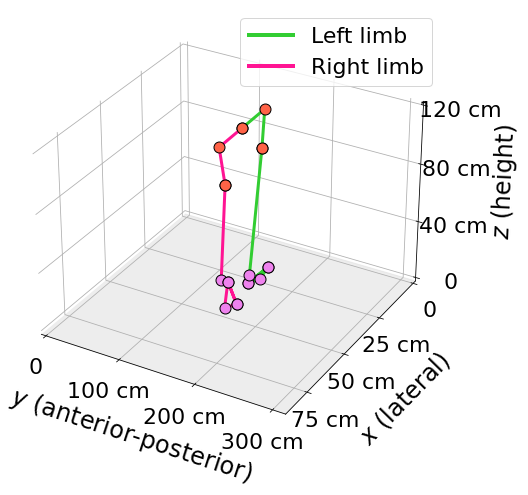

Running for: 1002.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


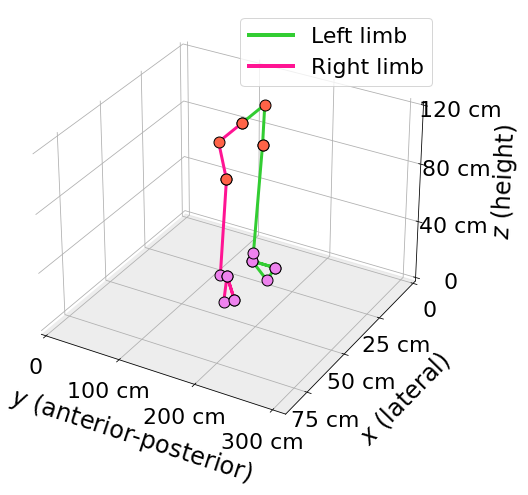

Running for: 1003.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


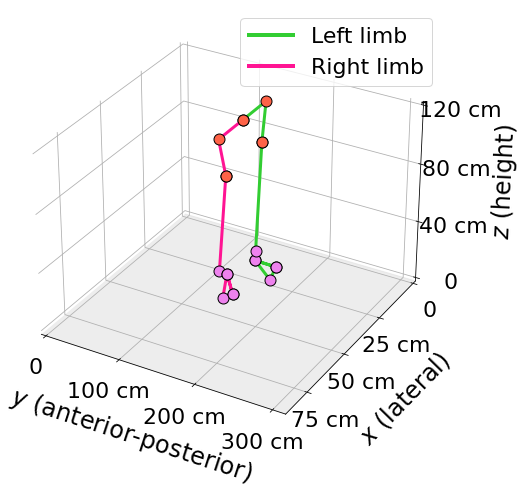

Running for: 1004.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


KeyboardInterrupt: 

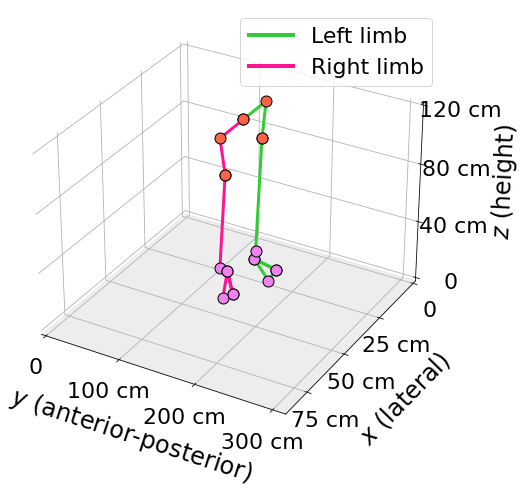

In [13]:
multi_view_files = os.listdir(multi_view_path)
relevant_multi_view_files = ['1001.csv']

for multi_view_file in multi_view_files:
    multi_view_viz(multi_view_file)
    
    
#103, 104, 1047, 1048, 105, 106, 1065, 109, 1142, 1143, 
#1000, 1001, 

Running for: 0.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


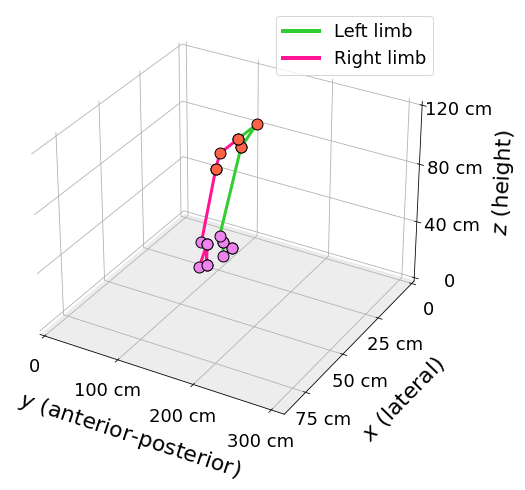

Running for: 1.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


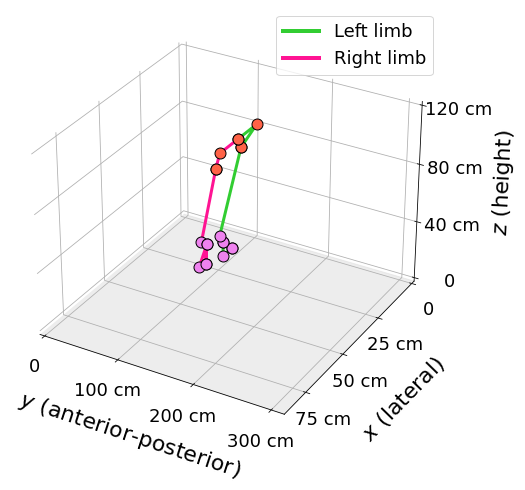

Running for: 10.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


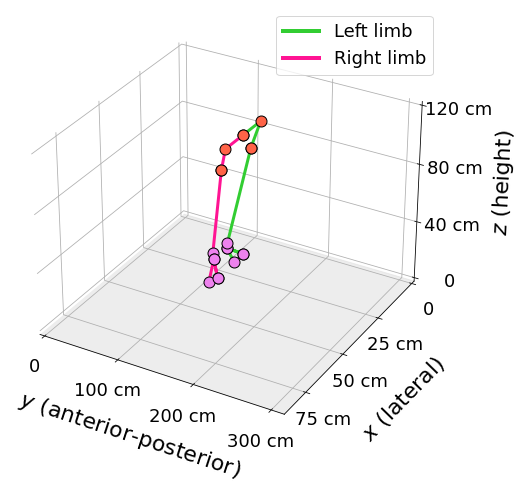

Running for: 100.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


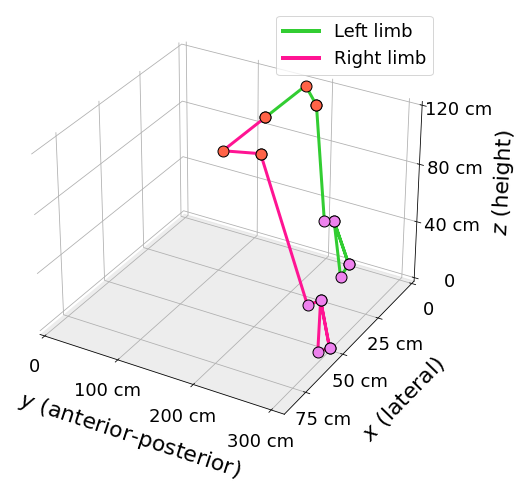

Running for: 1000.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


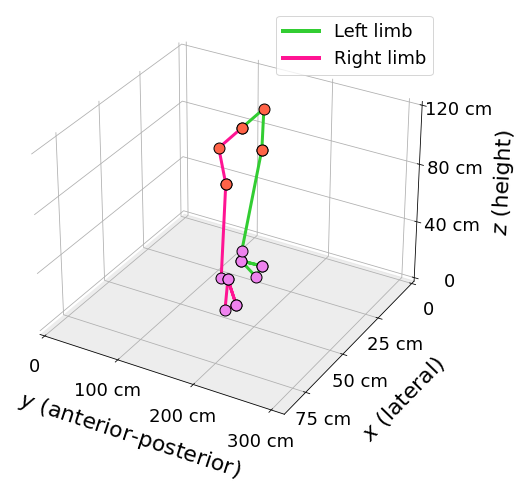

Running for: 1001.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


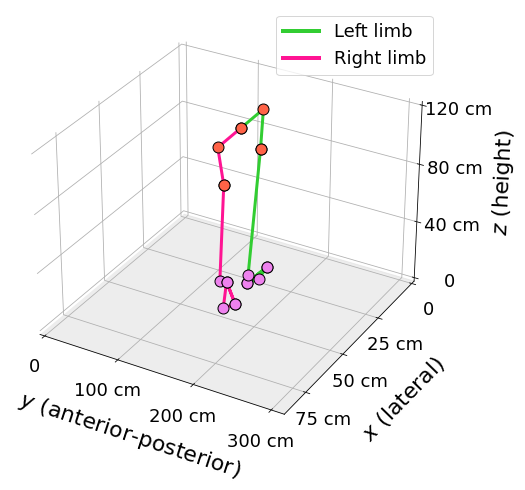

Running for: 1002.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


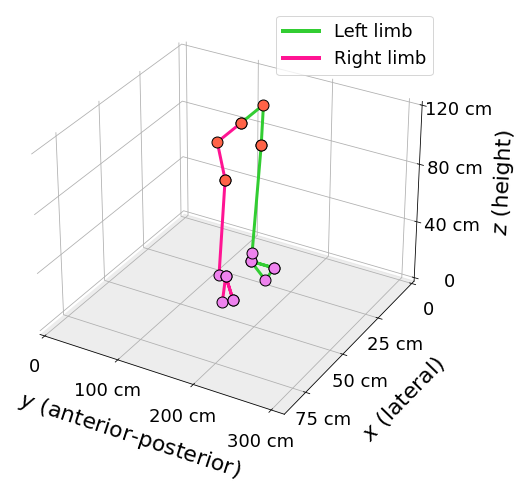

Running for: 1003.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


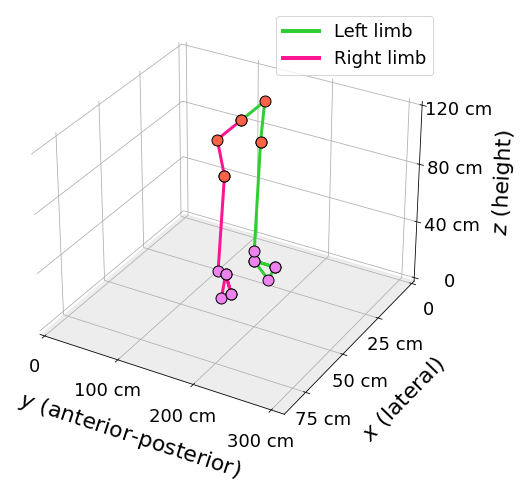

Running for: 1004.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


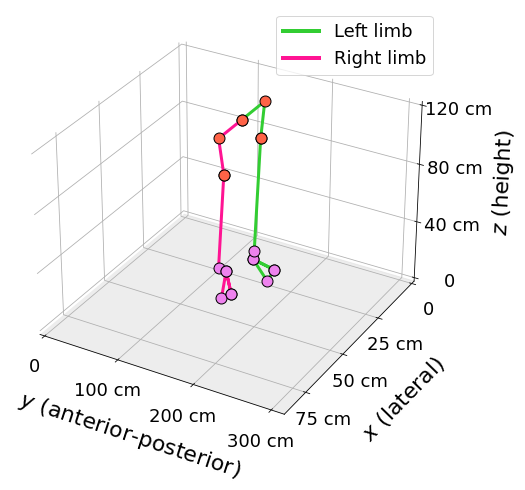

Running for: 1005.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


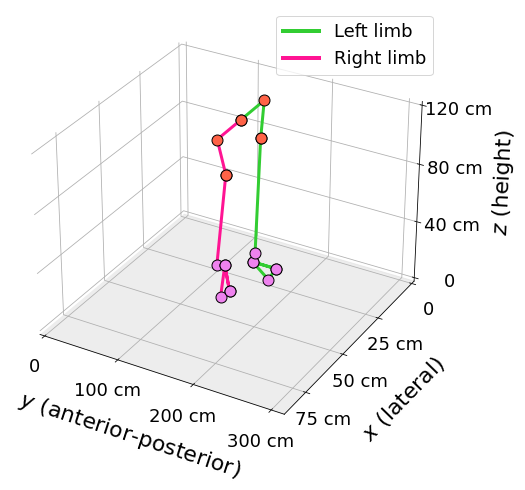

Running for: 1006.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


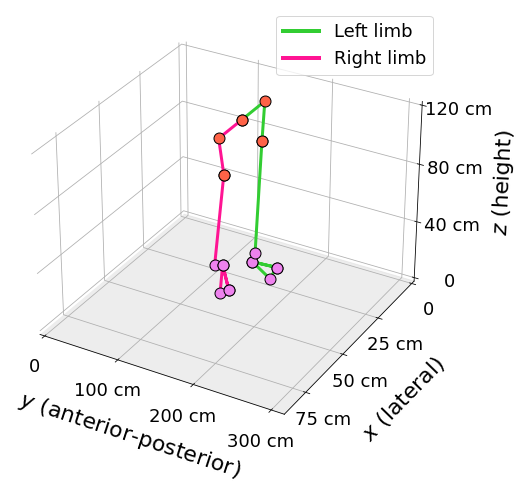

Running for: 1007.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


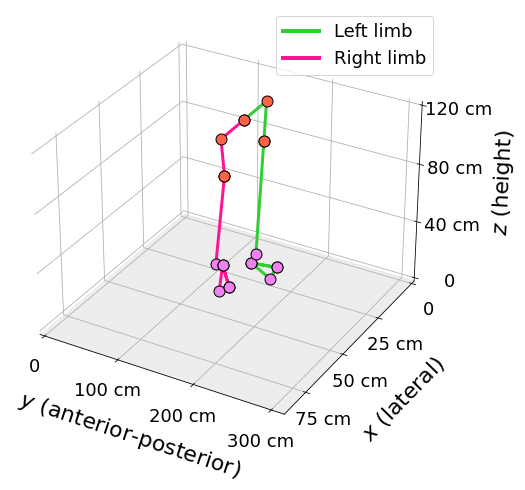

Running for: 1008.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


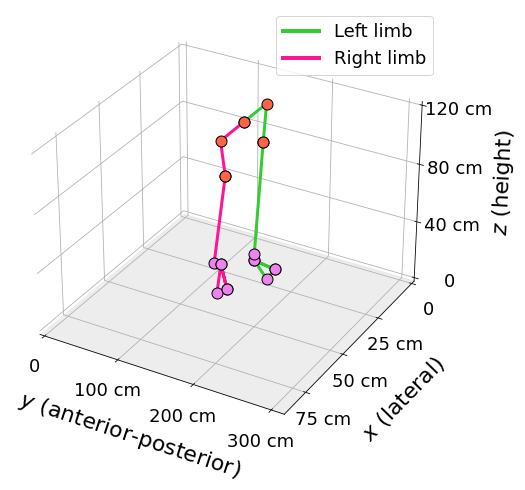

Running for: 1009.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


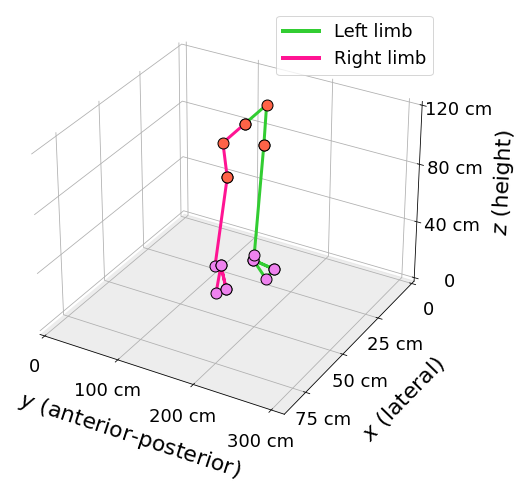

Running for: 101.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


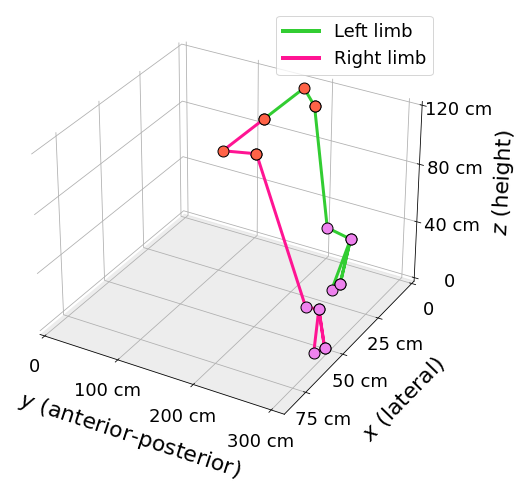

Running for: 1010.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


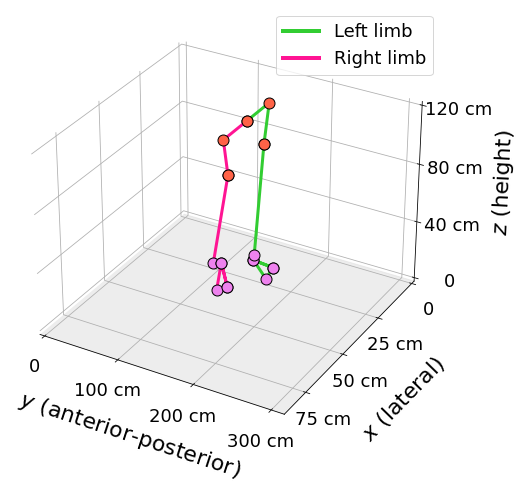

Running for: 1011.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


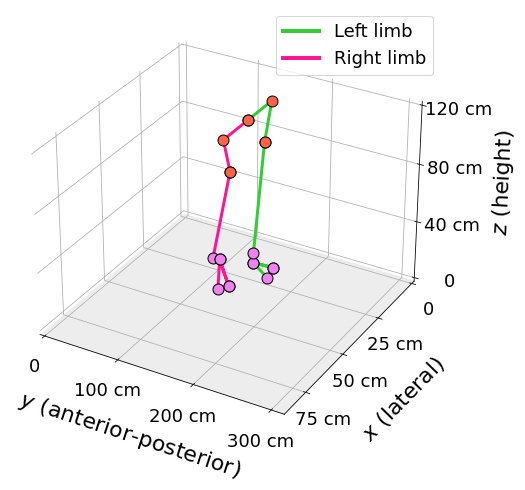

Running for: 1012.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


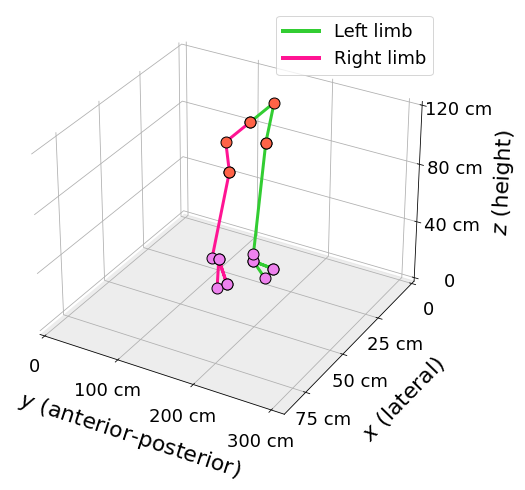

Running for: 1013.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


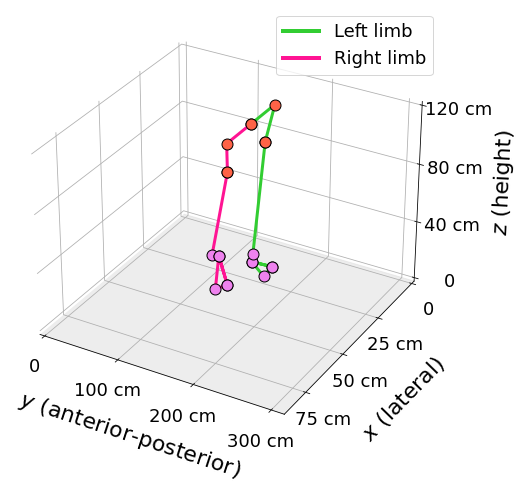

Running for: 1014.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


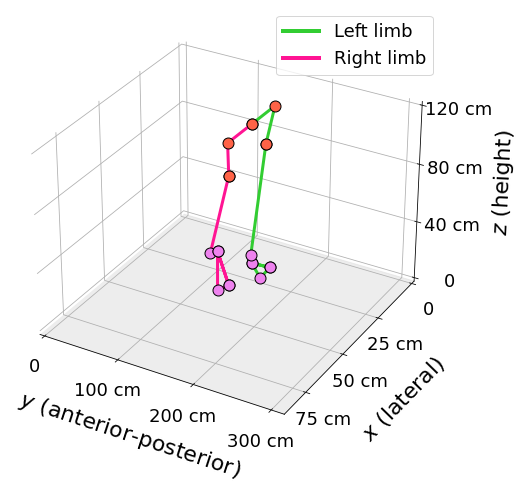

Running for: 1015.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


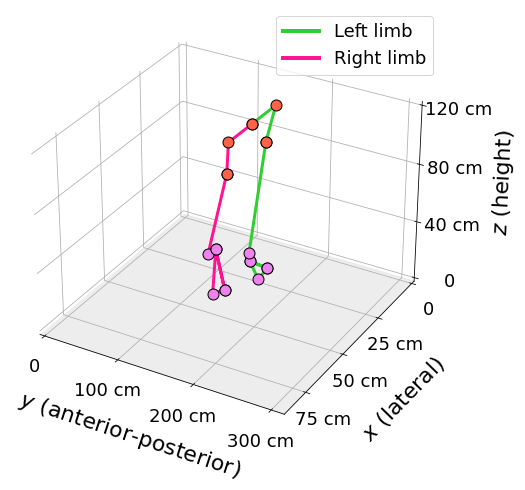

Running for: 1016.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


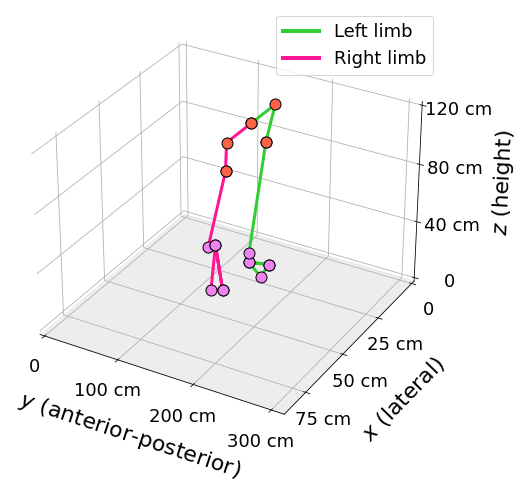

Running for: 1017.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


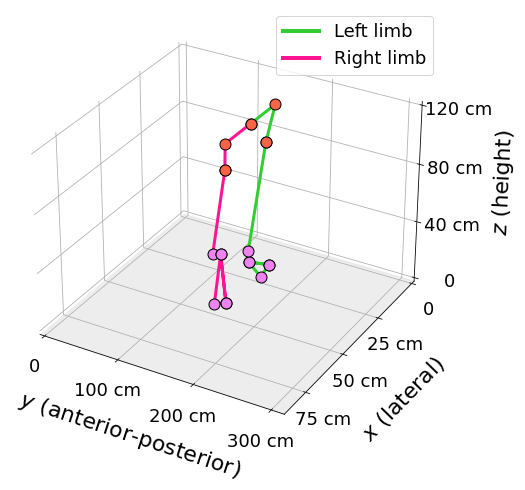

Running for: 1018.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


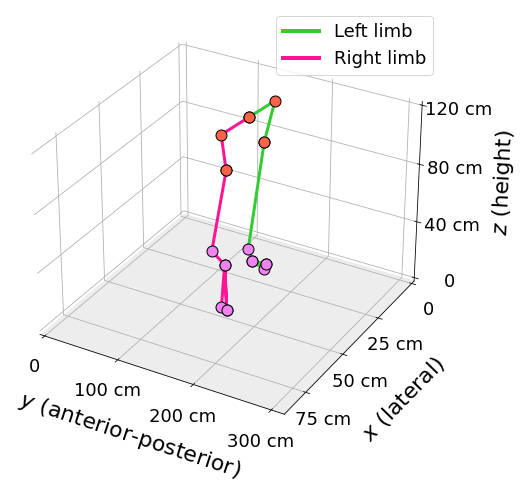

Running for: 1019.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


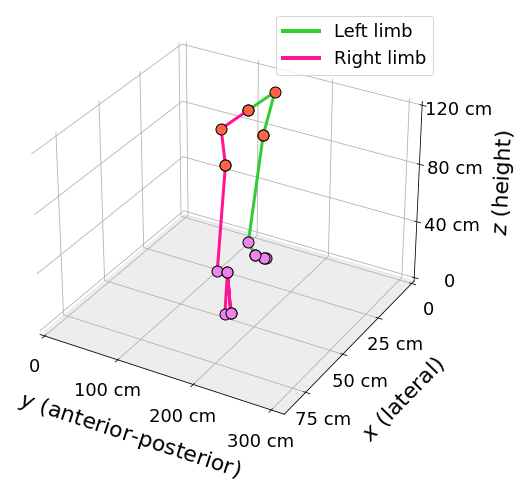

Running for: 102.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


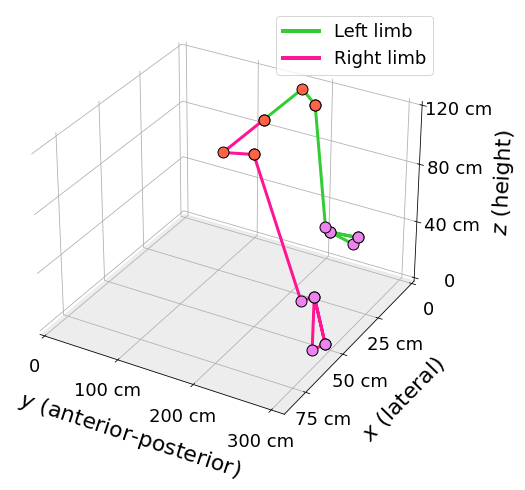

Running for: 1020.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


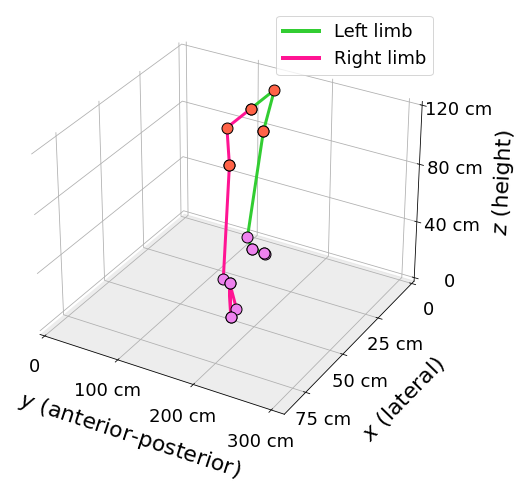

Running for: 1021.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


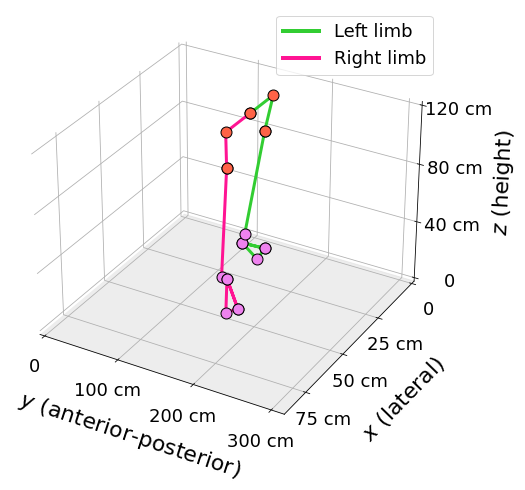

Running for: 1022.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


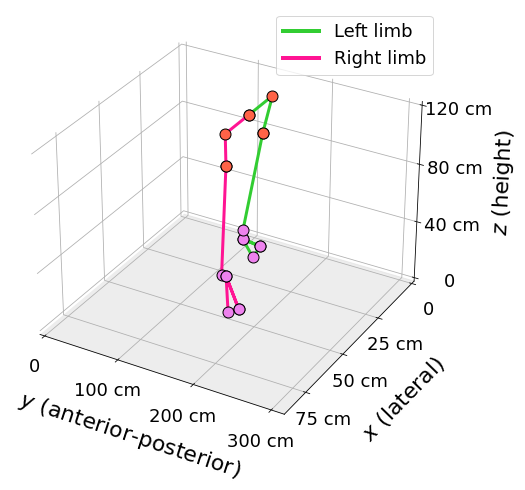

Running for: 1023.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


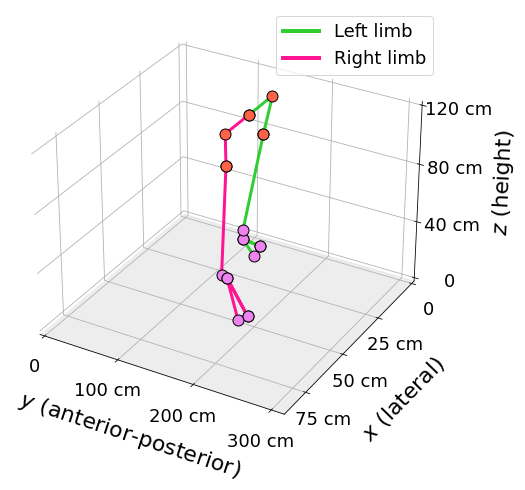

Running for: 1024.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


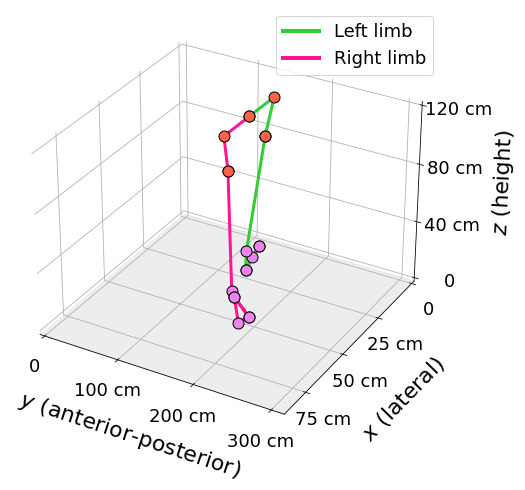

Running for: 1025.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


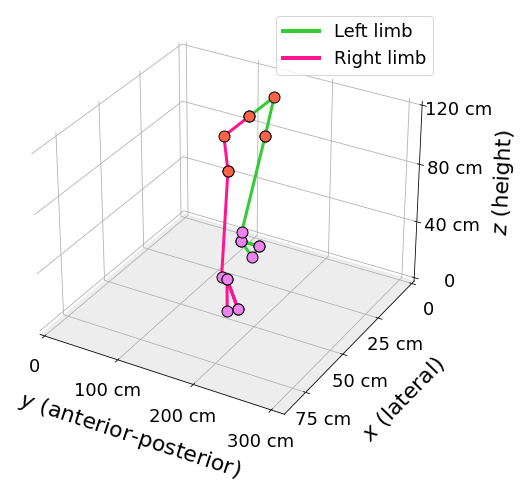

Running for: 1026.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


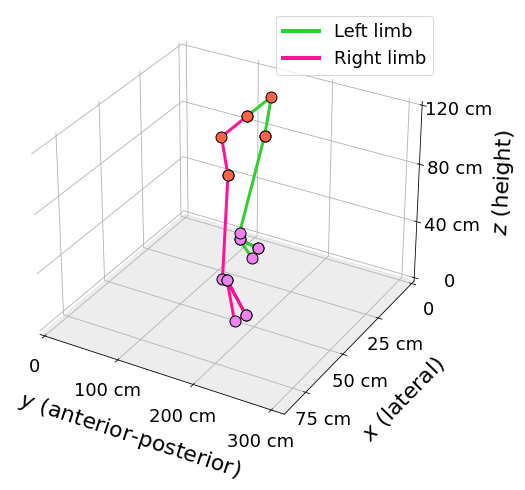

Running for: 1027.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


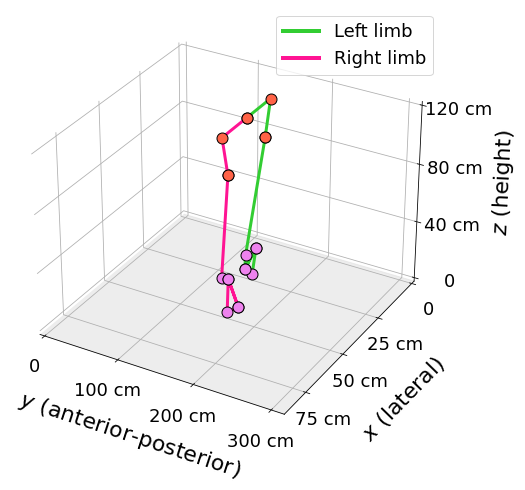

Running for: 1028.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


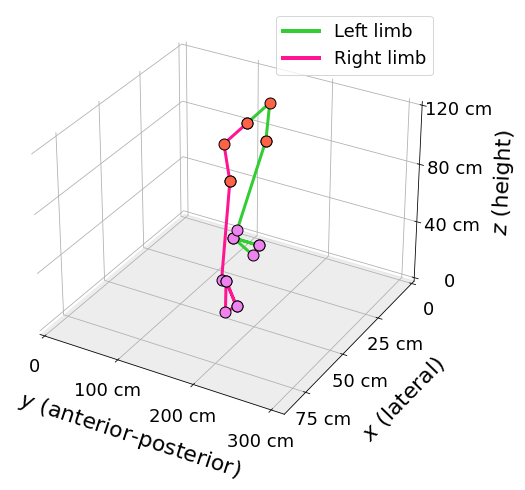

Running for: 1029.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


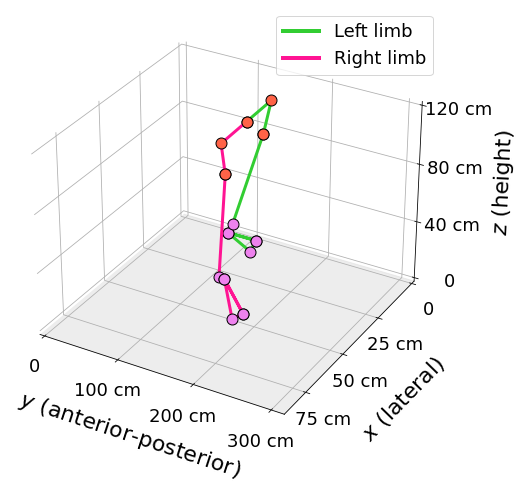

Running for: 103.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


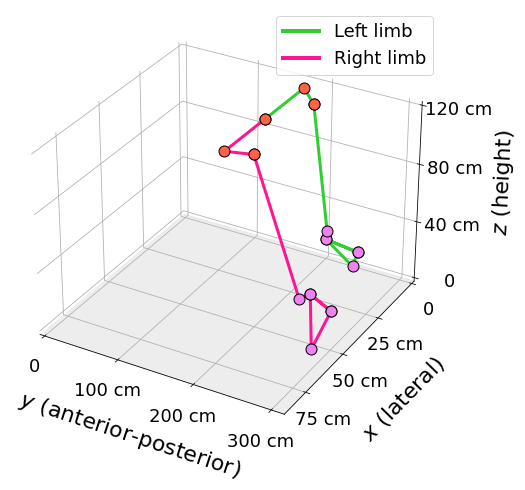

Running for: 1030.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


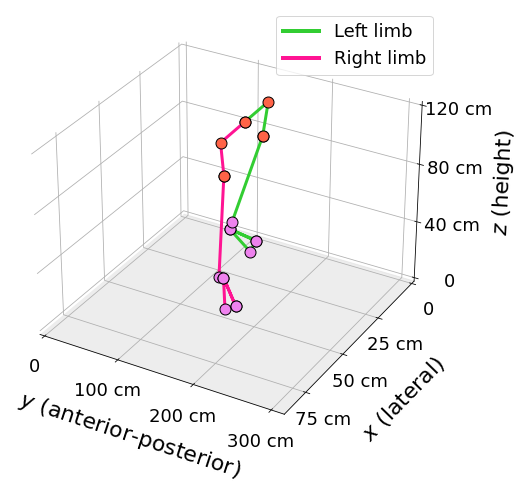

Running for: 1031.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


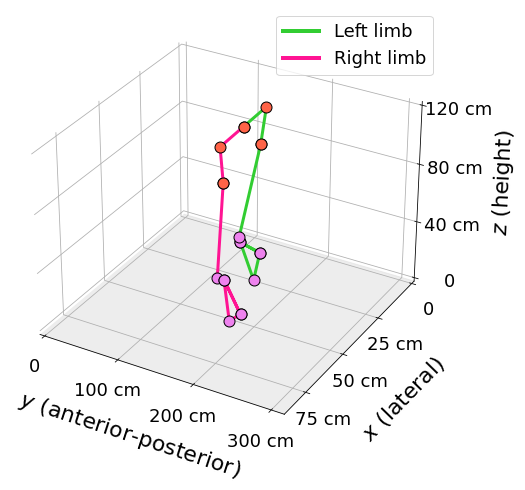

Running for: 1032.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


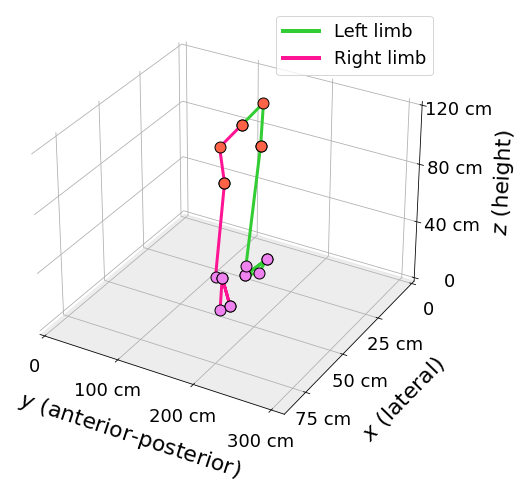

Running for: 1033.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


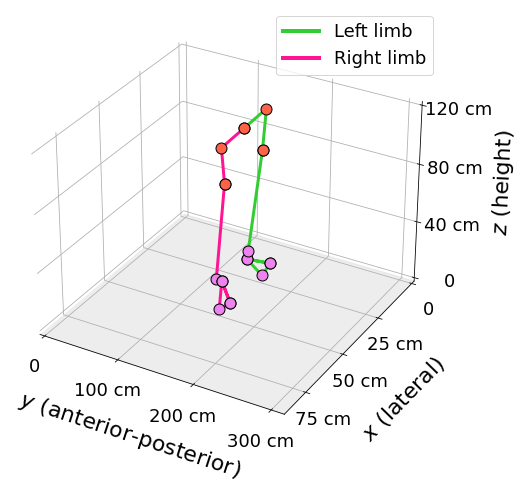

Running for: 1034.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


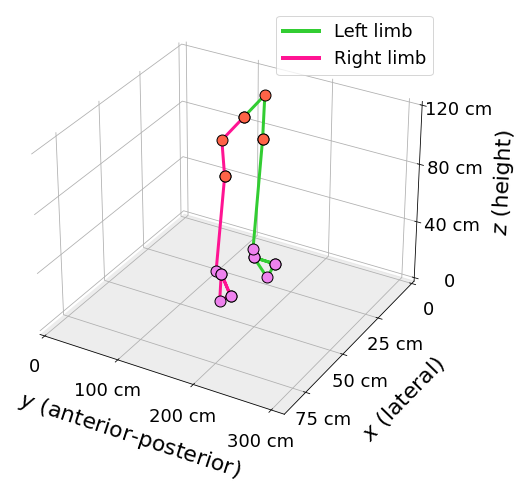

Running for: 1035.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


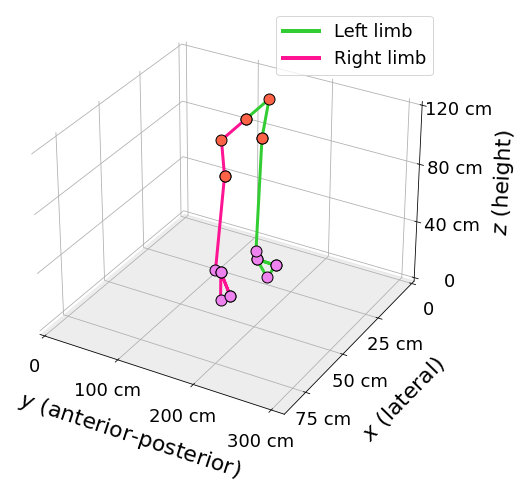

Running for: 1036.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


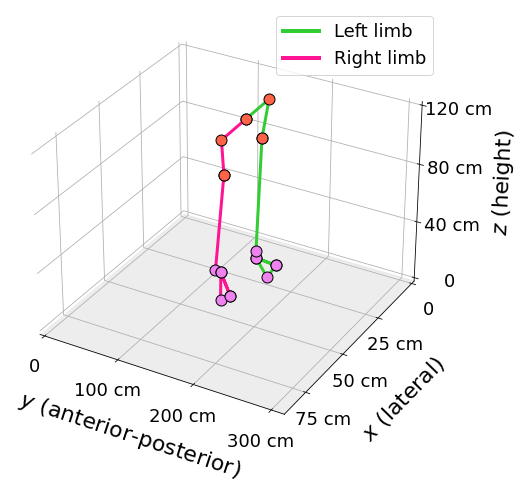

Running for: 1037.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


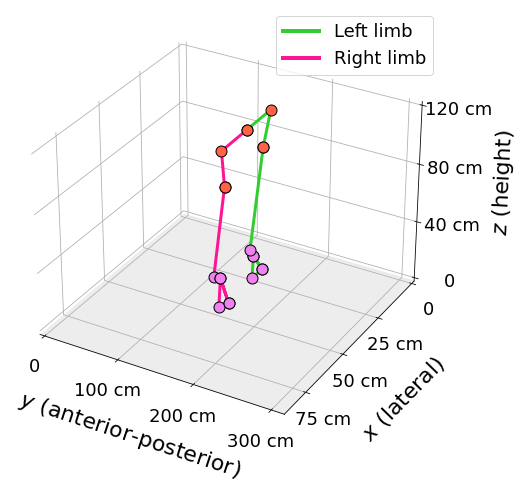

Running for: 1038.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


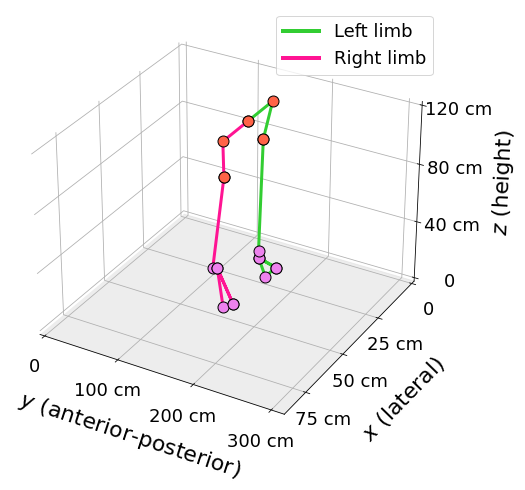

Running for: 1039.csv


C:\Users\Rachneet Kaur\AppData\Roaming\Python\Python37\site-packages\ipykernel\__main__.py:63: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


KeyboardInterrupt: 

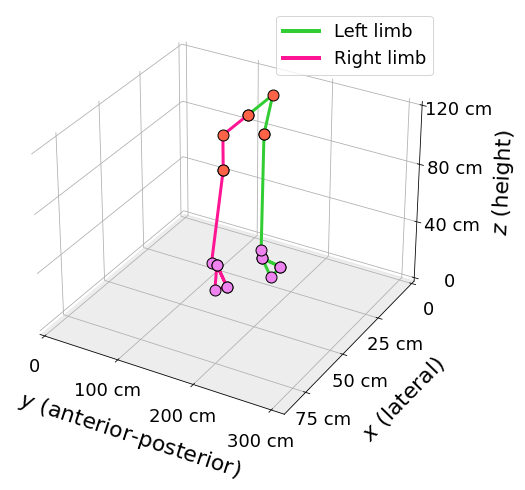

In [54]:
#Hip height normalized versions of multi view fused 
multi_view_files = os.listdir(multi_view_hip_norm_path)
relevant_multi_view_files = ['1001.csv']

for multi_view_file in multi_view_files:
    multi_view_viz(multi_view_file, hip_normalized = True)
    
    
#103, 104, 1047, 1048, 105, 106, 1065, 109, 1142, 1143, 
#1000, 1001, 

